In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

In [50]:
data = pd.read_csv(r"C:\Users\gabca\Documents\python\data\online_retail.csv")

In [51]:
# Displaying the first few rows of the data
data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [52]:
data.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [53]:
# Number of records in the data
print(data.count())

index          541909
InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64


In [54]:
# Missing values in each column
print(data.isnull().sum())

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [55]:
# Number of unique values in each column
print(data.nunique())

index          541909
InvoiceNo       25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
dtype: int64


## Data Preparation

In [56]:
# Converting "InvoiceDate" column to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        541909 non-null  int64         
 1   InvoiceNo    541909 non-null  object        
 2   StockCode    541909 non-null  object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


In [57]:
print(data["InvoiceDate"].head())
print(data["InvoiceDate"].dtype)

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]
datetime64[ns]


## EDA

In [58]:
# Statistical summary of numerical columns
data.describe()

,index,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909,541909.000000,406829.000000
mean,270954.000000,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,0.000000,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,135477.000000,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,270954.000000,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,406431.000000,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,541908.000000,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,156435.797851,218.081158,NaN,96.759853,1713.600303


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        541909 non-null  int64         
 1   InvoiceNo    541909 non-null  object        
 2   StockCode    541909 non-null  object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


In [60]:
# Unique values in the "CustomerID" column
data["CustomerID"].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.], shape=(4373,))

In [61]:
# Unique values in the "Country" column
data["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [62]:
# Unique values in the "Description" column
data["Description"].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], shape=(4224,), dtype=object)

### Data cleaning

In [63]:
# Data cleaning: Removing rows with missing values in "CustomerID"
data = data.dropna(subset=["CustomerID"])

# Rows display after cleaning
print("CustomerID:", len(data))

data["CustomerID"].unique()


CustomerID: 406829


array([17850., 13047., 12583., ..., 13298., 14569., 12713.], shape=(4372,))

In [64]:
# Data cleaning: Removing rows with missing values in "Description"
data = data.dropna(subset=["Description"])

# Rows display after cleaning
print("Description:", len(data))

data["Description"].unique()

Description: 406829


array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], shape=(3896,), dtype=object)

In [65]:
# Missing values in each column
print(data.isnull().sum())

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [66]:
# Removing rows with non-positive quantities (returns or errors)
data = data[data["Quantity"] > 0]

In [67]:
# Calculating total price for each transaction
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

# Displaying the first few rows with the new "TotalPrice" column
print(data[["Quantity", "UnitPrice", "TotalPrice"]].head())

   Quantity  UnitPrice  TotalPrice
0         6       2.55       15.30
1         6       3.39       20.34
2         8       2.75       22.00
3         6       3.39       20.34
4         6       3.39       20.34


### Visualization

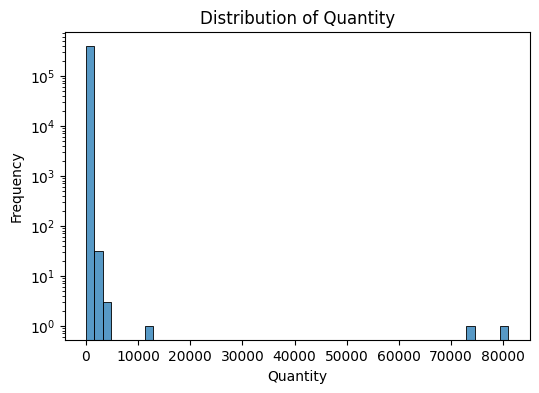

In [68]:
# This histogram shows the distribution of Quantity values in the dataset.
# A logarithmic scale is applied to the Y-axis (plt.yscale("log")) to better visualize the frequency of less common values.
# Without the log scale, the extremely high frequency of low Quantity values would dominate the chart, making it difficult to observe the distribution of higher Quantity values.
# This transformation helps reveal the long-tail nature of the data and highlights rare but large orders.

plt.figure(figsize=(6,4))
plt.yscale("log")
sns.histplot(data["Quantity"], bins=50, kde=False)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()


This histogram visualizes the frequency of quantity values across the dataset. The x-axis represents the quantity ordered, ranging from 0 to 80,000, while the y-axis uses a logarithmic scale to show frequency, spanning from 10⁰ to 10⁶.

The distribution is highly skewed, with most transactions concentrated at low quantity values. A sharp peak near zero indicates that small orders dominate the dataset. A few isolated bars at higher quantities (around 10,000, 70,000, and 80,000) suggest rare but extreme outliers.

This pattern reflects a long-tail distribution, which may be relevant for identifying anomalies, bulk purchases, or data entry errors. The use of a logarithmic scale helps reveal structure in both common and rare quantity ranges.

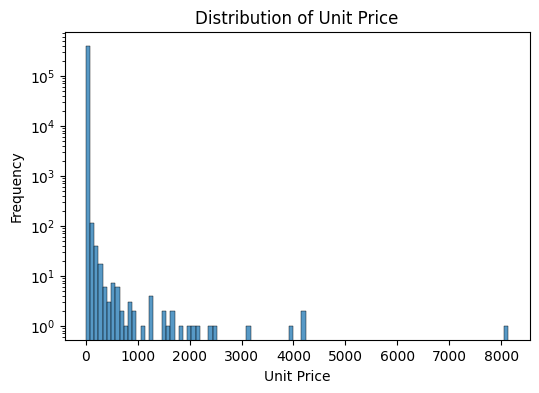

In [69]:
# This histogram shows the distribution of Unit Price values in the dataset.
# A logarithmic scale is applied to the Y-axis (plt.yscale("log")) to better visualize the frequency of less common values.

plt.figure(figsize=(6,4))
plt.yscale("log")
sns.histplot(data["UnitPrice"], bins=100, kde=False)
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()


This histogram shows the frequency of unit prices across the dataset. The x-axis represents unit price values ranging from 0 to 8,000, while the y-axis uses a logarithmic scale to display frequency, spanning from 1 to over 100,000.

The distribution is highly skewed, with most unit prices concentrated near zero. Frequency drops sharply as prices increase, indicating that high-priced items are rare. A few isolated bars at the upper end suggest the presence of outliers or premium products.

This pattern highlights a long-tail pricing structure, which may be useful for identifying anomalies, pricing strategy gaps, or data entry errors. The logarithmic scale helps reveal both common and rare price ranges in a single view.

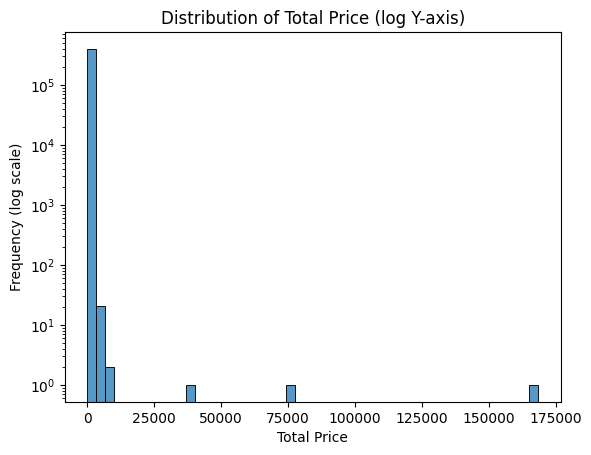

In [70]:
# This histogram shows the distribution of Total Price values in the dataset.
# A logarithmic scale is applied to the Y-axis (plt.yscale("log")) to better visualize the frequency of less common values.

sns.histplot(data["TotalPrice"], bins=50)
plt.yscale("log")
plt.title("Distribution of Total Price (log Y-axis)")
plt.xlabel("Total Price")
plt.ylabel("Frequency (log scale)")
plt.show()

This histogram shows the frequency of unit prices across the dataset. The x-axis represents unit price values ranging from 0 to 8,000, while the y-axis uses a logarithmic scale to display frequency, spanning from 1 to over 100,000.

The distribution is highly skewed, with most unit prices concentrated near zero. Frequency drops sharply as prices increase, indicating that high-priced items are rare. A few isolated bars at the upper end suggest the presence of outliers or premium products.

This pattern highlights a long-tail pricing structure, which may be useful for identifying anomalies, pricing strategy gaps, or data entry errors. The logarithmic scale helps reveal both common and rare price ranges in a single view.

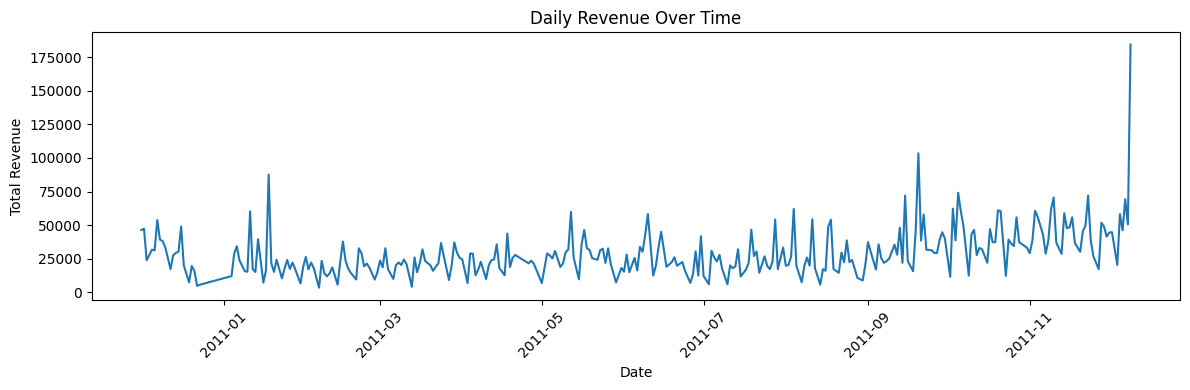

In [71]:
# Creating daily total sales
daily_sales = data.groupby(data["InvoiceDate"].dt.date)["TotalPrice"].sum()

# Create a time series plot
daily_sales.plot(figsize=(12,4))
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This line chart illustrates the total daily revenue throughout the year 2011. The x-axis represents the date, spanning from January to December, while the y-axis shows total revenue per day.

The graph reveals noticeable fluctuations in revenue, with several sharp spikes indicating high-performing days. A significant peak appears near the end of the year, suggesting a seasonal surge—possibly linked to holiday shopping or year-end promotions.

This visualization helps identify trends, peak periods, and potential anomalies in daily sales performance. It can be used to guide inventory planning, staffing decisions, and marketing timing.

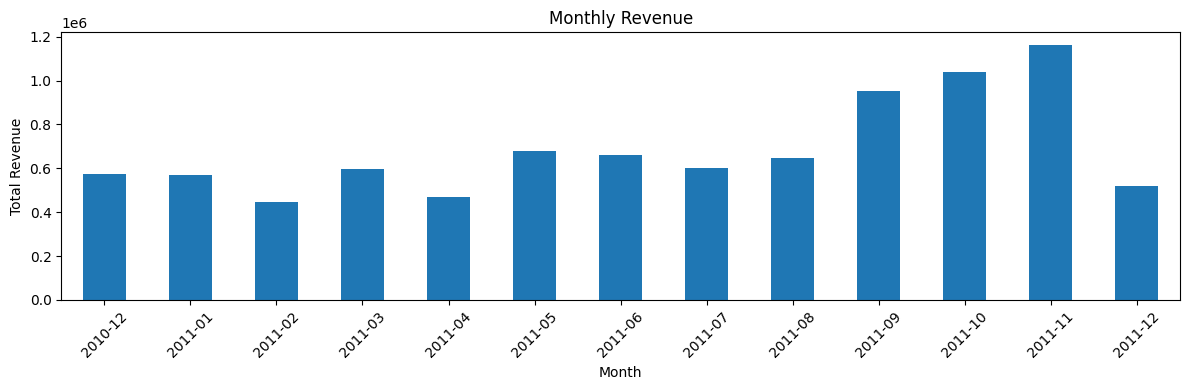

In [72]:
# Creating monthly total sales
monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period("M"))["TotalPrice"].sum()

# Create a bar plot for monthly sales
monthly_sales.plot(kind="bar", figsize=(12,4))
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart shows total revenue per month from December 2010 to December 2011. The x-axis represents each month, while the y-axis displays total monthly revenue, scaled up to 1.2 million.

Revenue fluctuates throughout the year, with a clear peak in November 2011 and the lowest point in February 2011. The strong performance in November may reflect seasonal demand, such as pre-holiday shopping or promotional campaigns.

This visualization helps identify monthly trends, seasonal patterns, and periods of high or low performance. It can support decisions related to budgeting, inventory planning, and marketing strategy.

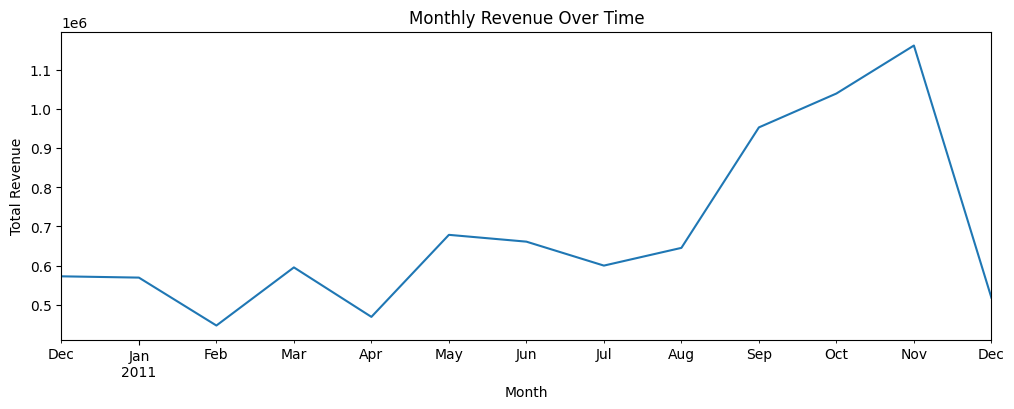

In [73]:
# Create a time series plot for monthly sales
monthly_sales.plot(x="Period", y="TotalPrice", figsize=(12,4))
plt.title("Monthly Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

This line chart shows the trend of total monthly revenue from December 2011 to December of the following year. The x-axis represents each month, while the y-axis displays total revenue in millions.

Revenue begins at approximately 0.6 million in December 2011, dips in February, rises in March, and fluctuates through spring. From May to November, there is a steady upward trend, peaking at over 1.1 million in November. A sharp decline follows in December.

This visualization highlights seasonal patterns and growth phases, helping identify high-performing periods and potential downturns. It can support planning for promotions, inventory, and financial forecasting.

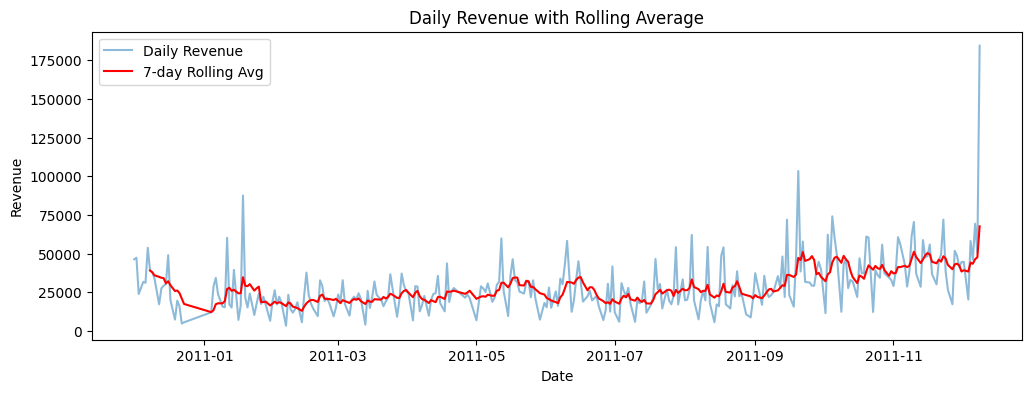

In [74]:
# Creating daily total sales
daily_sales = data.groupby(data["InvoiceDate"].dt.date)["TotalPrice"].sum()

# Calculate rolling average (7-day window)
daily_sales_rolling = daily_sales.rolling(window=7).mean()

# Create a time series plot with rolling average
plt.figure(figsize=(12,4))
plt.plot(daily_sales.index, daily_sales, label="Daily Revenue", alpha=0.5)
plt.plot(daily_sales_rolling.index, daily_sales_rolling, label="7-day Rolling Avg", color="red")
plt.title("Daily Revenue with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

This line chart displays daily revenue trends throughout 2011. The light blue line represents raw daily revenue, while the red line shows a 7-day rolling average that smooths short-term fluctuations.

The chart reveals frequent spikes in daily revenue, indicating high-activity days or promotional events. The rolling average highlights broader trends, including seasonal growth and periods of decline.

This visualization helps distinguish between short-term volatility and long-term patterns, supporting decisions in forecasting, staffing, and campaign planning.

In [77]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data["Year"] = data["InvoiceDate"].dt.year
data["Month"] = data["InvoiceDate"].dt.month

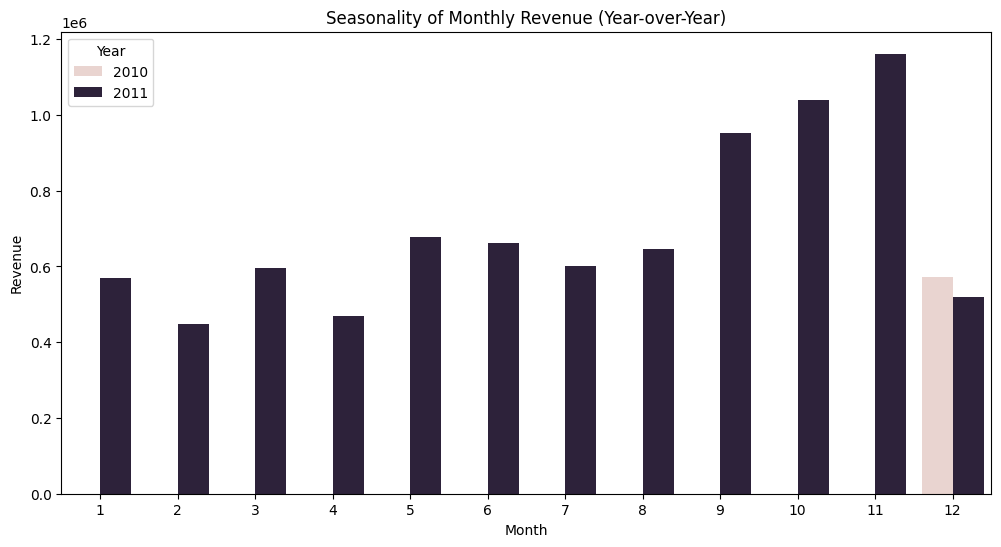

In [78]:
# Agregation monthly sales by year
monthly_sales_by_year = data.groupby(["Year","Month"])["TotalPrice"].sum().reset_index()

# Visualiyation: comparison of months between years
plt.figure(figsize=(12,6))
sns.barplot(x="Month", y="TotalPrice", hue="Year", data=monthly_sales_by_year)
plt.title("Seasonality of Monthly Revenue (Year-over-Year)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


This bar chart compares monthly revenue across two years, 2010 and 2011. Data availability is limited: both years are represented only in December, while the other months show revenue for 2011 alone.

The chart highlights a strong seasonal peak in November 2011, followed by December where both years can be compared side by side. December 2011 shows higher revenue than December 2010, indicating year-over-year growth during the holiday season.

This visualization demonstrates seasonal demand patterns and emphasizes the importance of the final quarter of the year. It also shows that data coverage for 2010 is restricted, which should be considered when interpreting year-over-year trends.

In [79]:
# Number of unique orders and unique orders per customer
print(data["InvoiceNo"].nunique())  # number of unique orders
print(data[["InvoiceNo", "CustomerID"]].drop_duplicates().shape[0])  # number of unique orders per customer

18536
18536


In [80]:
# Calculate number of orders per customer
orders_per_customer = (
    data[["CustomerID", "InvoiceNo"]]
    .drop_duplicates()
    .groupby("CustomerID")
    .count()
    .rename(columns={"InvoiceNo": "OrderCount"})
)

orders_per_customer.sort_values("OrderCount", ascending=False).head(10)

,OrderCount
CustomerID,
12748.0,210
14911.0,201
17841.0,124
13089.0,97
14606.0,93
15311.0,91
12971.0,86
14646.0,74
16029.0,63


In [81]:
print("Average orders per customer:", orders_per_customer["OrderCount"].mean())

Average orders per customer: 4.271952062687255


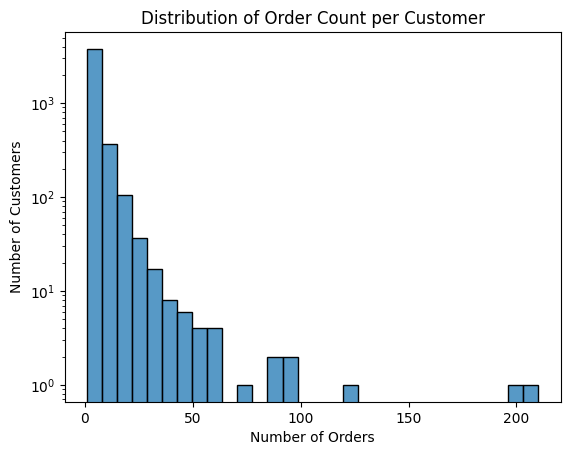

In [82]:
sns.histplot(orders_per_customer["OrderCount"], bins=30)
plt.yscale("log")
plt.title("Distribution of Order Count per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()

This histogram shows how frequently customers place orders. The x-axis represents the number of orders per customer, ranging from 0 to 200. The y-axis uses a logarithmic scale to display the number of customers, spanning from 1 to over 1,000.

The distribution is heavily skewed: most customers place only a few orders, while a small number of customers place many. A few isolated bars at higher order counts indicate the presence of high-value or highly engaged customers.

This visualization helps identify customer behavior patterns, segment loyalty levels, and detect outliers. It can support strategies for retention, targeting frequent buyers, and understanding overall customer engagement.

#### RFM analysis

In [83]:
# Find the latest invoice date, reference date
latest_date = data["InvoiceDate"].max()

In [84]:
# Create RFM table
rfm = (
    data.groupby("CustomerID")
    .agg({
        "InvoiceDate": lambda x: (latest_date - x.max()).days,  # Recency
        "InvoiceNo": "nunique",                                 # Frequency
        "TotalPrice": "sum"                                     # Monetary
    })
    .rename(columns={
        "InvoiceDate": "Recency",
        "InvoiceNo": "Frequency",
        "TotalPrice": "Monetary"
    })
)

In [85]:
# Creating RFM Scores collumns
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])

rfm["RFM_Score"] = (
    rfm["R_Score"].astype(int) +
    rfm["F_Score"].astype(int) +
    rfm["M_Score"].astype(int)
)
''

''

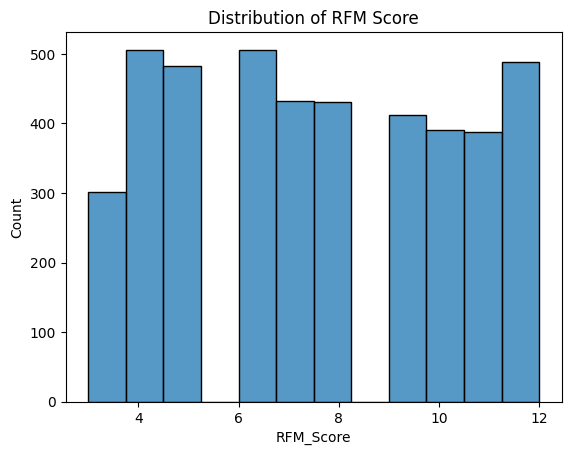

In [86]:
sns.histplot(rfm["RFM_Score"], bins=12)
plt.title("Distribution of RFM Score")
plt.show()

Most customers has score 4, 6 and 12. This can mean:
-    4: customers with low spending and low activity, but who made a recent purchase.
-    6: average customers with moderate frequency and spending.
-   12: your best customers — they purchase frequently, spend a lot, and were active recently.
 

In [87]:
# Segment customers based on RFM Score
rfm["Segment"] = pd.cut(rfm["RFM_Score"], bins=[2,5,8,12], labels=["Low", "Medium", "High"])

In [88]:
# Average Monetary value by segment
rfm.groupby("Segment")["Monetary"].mean()

C:\Users\gabca\AppData\Local\Temp\ipykernel_36788\614726076.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby("Segment")["Monetary"].mean()


Segment
Low        278.285978
Medium     836.380126
High      4409.175358
Name: Monetary, dtype: float64

Text(0.5, 1.0, 'Customer Segments by RFM Score')

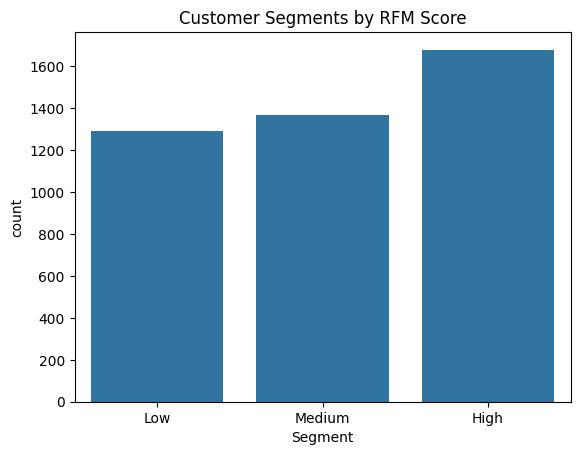

In [89]:
# Visualize customer segments
sns.countplot(x="Segment", data=rfm)
plt.title("Customer Segments by RFM Score")

This bar chart shows the distribution of customers across three RFM segments: Low, Medium, and High. The segmentation is based on Recency, Frequency, and Monetary value, which are commonly used to evaluate customer engagement and value.

The largest group falls into the High segment, indicating a strong base of loyal and profitable customers. The Medium segment follows, while the Low segment represents less active or lower-value customers.

This visualization helps identify key customer groups for targeted marketing, retention strategies, and personalized communication. It supports data-driven decisions in customer relationship management and business growth planning.

C:\Users\gabca\AppData\Local\Temp\ipykernel_36788\1710392782.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot = rfm.pivot_table(index="R_Score", columns="F_Score", values="Monetary", aggfunc="mean")


Text(0.5, 1.0, 'Average Monetary Value by R and F Scores')

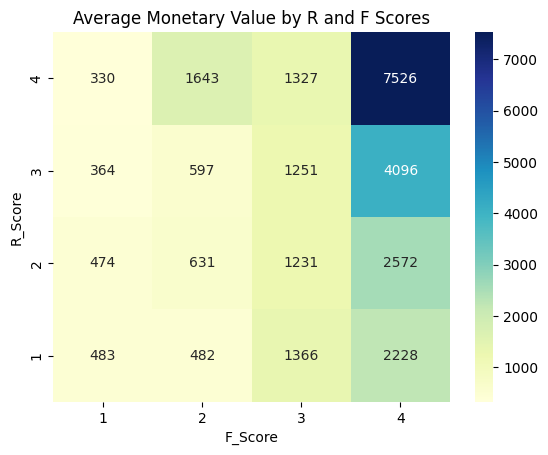

In [90]:
# heatmap of R and F scores vs Monetary value
rfm_pivot = rfm.pivot_table(index="R_Score", columns="F_Score", values="Monetary", aggfunc="mean")
sns.heatmap(rfm_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Monetary Value by R and F Scores")

The heatmap shows the average monetary value across combinations of Recency and Frequency scores.
Customers with high Recency (4) and high Frequency (4) tend to spend the most — over 7,500 on average — indicating they are highly engaged and valuable.
As Frequency increases, the average spending also rises, especially among recent buyers.
In contrast, customers with low Frequency and low Recency scores show significantly lower monetary values, suggesting limited engagement and low value.
This pattern confirms that frequent and recent buyers are the most profitable segment, and should be prioritized for retention and targeted marketing.


In [91]:
# Calculate total revenue per customer
revenue_per_customer = (
    data.groupby("CustomerID")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
)

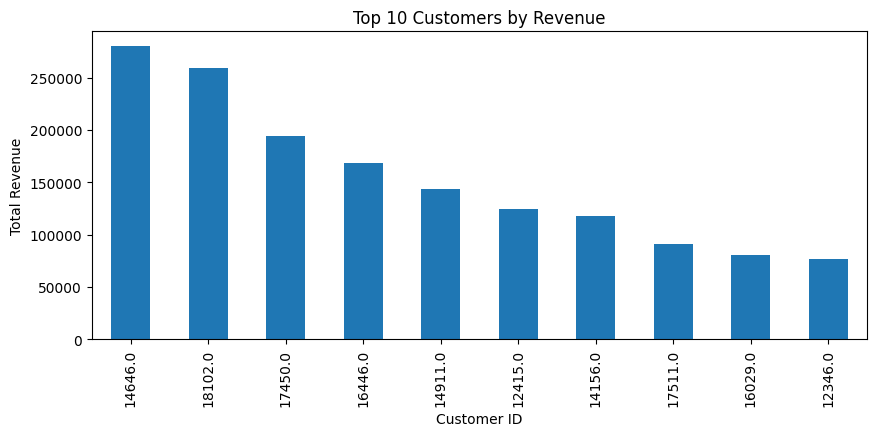

In [92]:
# Visualize top 10 customers by revenue
revenue_per_customer.head(10).plot(kind="bar", figsize=(10,4))
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.show()

We can see that customer ID 14646.0 brings the biggest revenue.

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


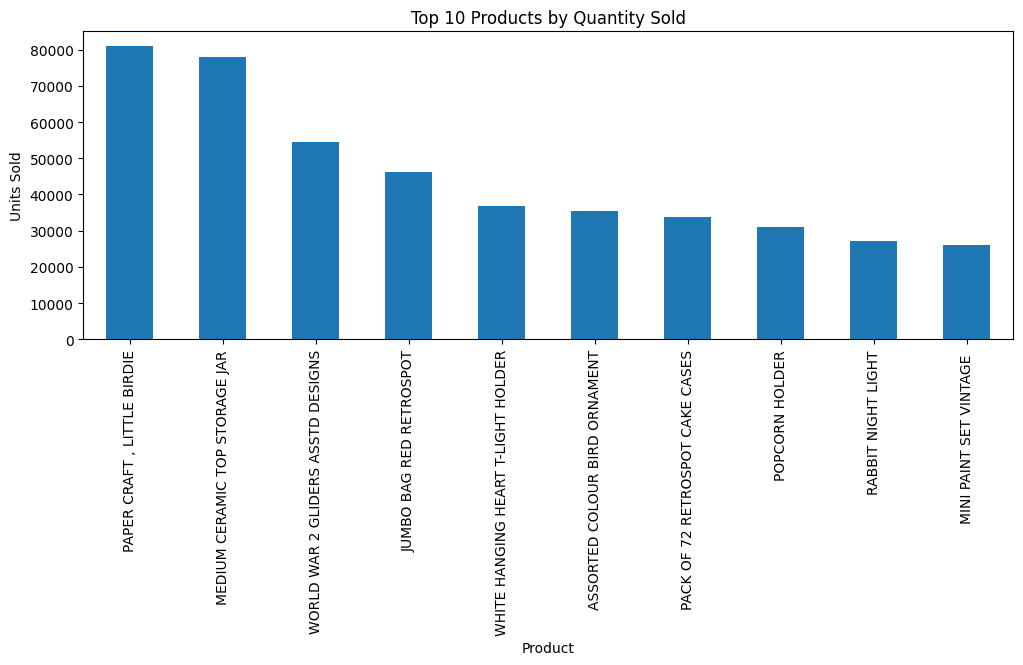

In [97]:
top_products_qty = (
    data.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_products_qty)

top_products_qty.plot(kind="bar", figsize=(12,4))
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.show()

This graph shows the top 10 products based on the total quantity sold and we can see that the top product is Paper Craft 'Little Birdie'.

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64


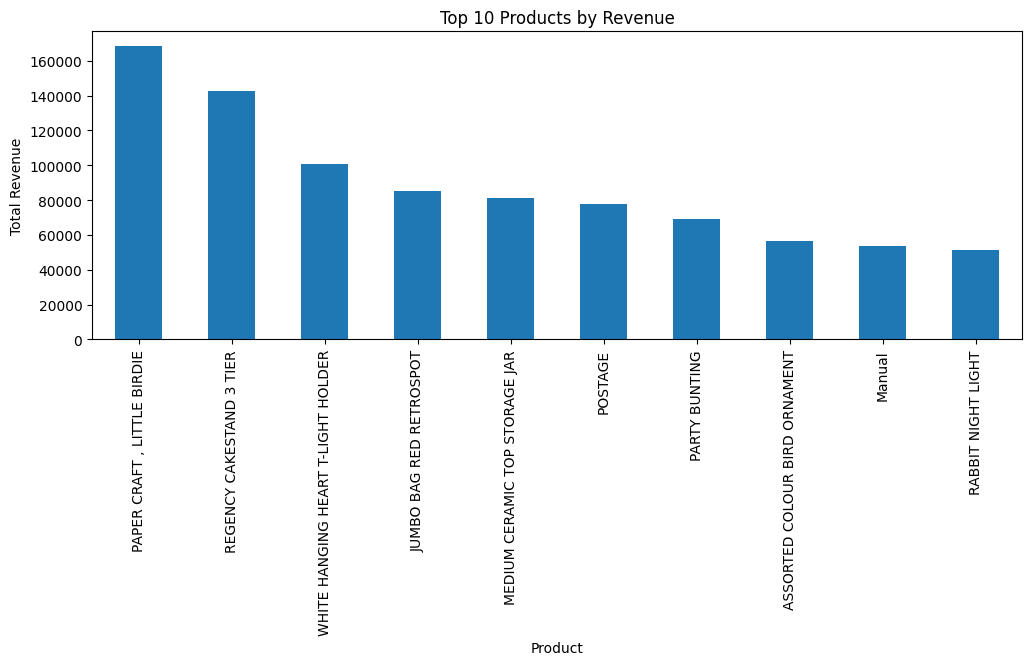

In [98]:
top_products_revenue = (
    data.groupby("Description")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_products_revenue)

top_products_revenue.plot(kind="bar", figsize=(12,4))
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()

This graph tells us which products are the most popular in terms of quantity sold, which is Paper Craft 'Little Birdie'.

In [100]:
top_combined = pd.merge(top_products_qty, top_products_revenue, on="Description", how="outer").sort_values(by="Quantity", ascending=False)

print(top_combined)


                                    Quantity  TotalPrice
Description                                             
PAPER CRAFT , LITTLE BIRDIE          80995.0   168469.60
MEDIUM CERAMIC TOP STORAGE JAR       77916.0    81416.73
WORLD WAR 2 GLIDERS ASSTD DESIGNS    54415.0         NaN
JUMBO BAG RED RETROSPOT              46181.0    85220.78
WHITE HANGING HEART T-LIGHT HOLDER   36725.0   100448.15
ASSORTED COLOUR BIRD ORNAMENT        35362.0    56580.34
PACK OF 72 RETROSPOT CAKE CASES      33693.0         NaN
POPCORN HOLDER                       30931.0         NaN
RABBIT NIGHT LIGHT                   27202.0    51346.20
MINI PAINT SET VINTAGE               26076.0         NaN
Manual                                   NaN    53779.93
PARTY BUNTING                            NaN    68844.33
POSTAGE                                  NaN    77803.96
REGENCY CAKESTAND 3 TIER                 NaN   142592.95


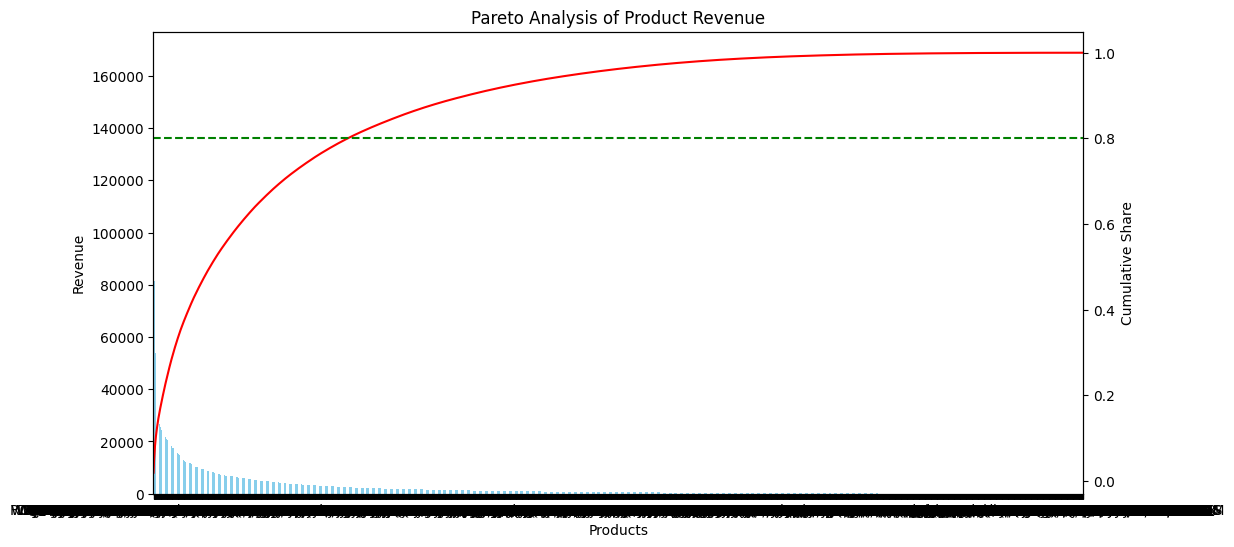

In [105]:
product_revenue = (
    data.groupby("Description")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
)

# Total revenue
total_revenue = product_revenue.sum()

# Cumulative revenue share
cumulative_share = product_revenue.cumsum() / total_revenue

pareto_df = pd.DataFrame({
    "Revenue": product_revenue,
    "CumulativeShare": cumulative_share
})

# Pareto chart

fig, ax = plt.subplots(figsize=(12,6))

# Bar = revenue
pareto_df["Revenue"].plot(kind="bar", ax=ax, color="skyblue")

# Line = cumulative share
pareto_df["CumulativeShare"].plot(ax=ax, color="red", secondary_y=True)

ax.set_title("Pareto Analysis of Product Revenue")
ax.set_xlabel("Products")
ax.set_ylabel("Revenue")
ax.right_ax.set_ylabel("Cumulative Share")

plt.axhline(0.8, color="green", linestyle="--")  # 80% line
plt.show()

In [107]:
# Sorted revenue by product
product_revenue = (
    data.groupby("Description")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
)

# Total revenue
total_revenue = product_revenue.sum()

# Cumulative share
cumulative_share = product_revenue.cumsum() / total_revenue

# Select products contributing to 80% of revenue
pareto_products = product_revenue[cumulative_share <= 0.8]

print("Number of products contributing to 80% of revenue:", len(pareto_products))

Number of products contributing to 80% of revenue: 810


                          Description    Revenue
0         PAPER CRAFT , LITTLE BIRDIE  168469.60
1            REGENCY CAKESTAND 3 TIER  142592.95
2  WHITE HANGING HEART T-LIGHT HOLDER  100448.15
3             JUMBO BAG RED RETROSPOT   85220.78
4      MEDIUM CERAMIC TOP STORAGE JAR   81416.73


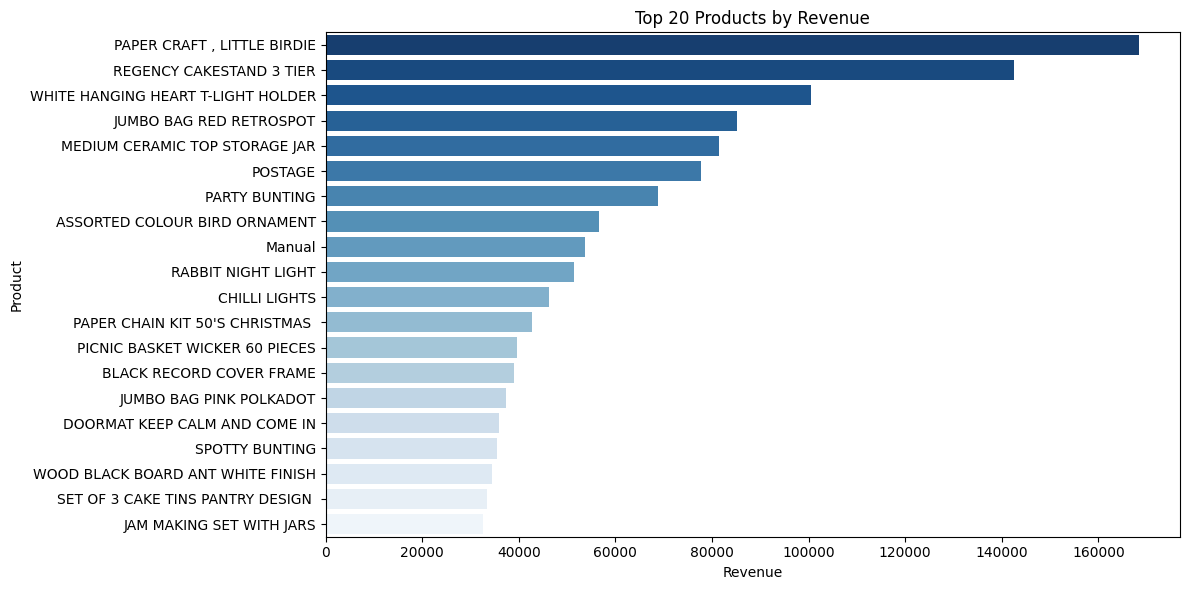

In [112]:
# 1. Complete table of all products by revenue
product_revenue = (
    data.groupby("Description")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"TotalPrice": "Revenue"})
)

print(product_revenue.head())   # preview of the first rows
# product_revenue.to_csv("product_revenue.csv", index=False)  # optional export

# 2. Top 20 products visualization
top20_products = product_revenue.head(20)

plt.figure(figsize=(12,6))
sns.barplot(
    x="Revenue",
    y="Description",
    data=top20_products,
    hue="Description",      # assign hue to the same variable
    dodge=False,            # prevents duplicate bars
    legend=False,           # hides the legend
    palette="Blues_r"
)
plt.title("Top 20 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

This chart displays the top 20 products ranked by total revenue. Each bar represents the revenue generated by a specific product, allowing for quick comparison of financial performance across the assortment.

- **Most profitable product:** Paper Craft 'Little Birdie' with over 168,000 in revenue.
- Other high-performing items include:
  - Regency cakestand 3 tier,
  - White hanging heart t-light holder,
  - Jumbo bag red retrospot,
  - Medium ceramic top storage jar.

These products represent the core revenue drivers and should be prioritized in inventory planning, marketing campaigns, and strategic decisions.

The visualization highlights how a small subset of products contributes disproportionately to overall sales, confirming the **Pareto principle (80/20 rule)** in product performance.

In [113]:
# Aggregate revenue by country
country_revenue = (
    data.groupby("Country")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print(country_revenue.head())  # preview top countries

          Country   TotalPrice
0  United Kingdom  7308391.554
1     Netherlands   285446.340
2            EIRE   265545.900
3         Germany   228867.140
4          France   209024.050


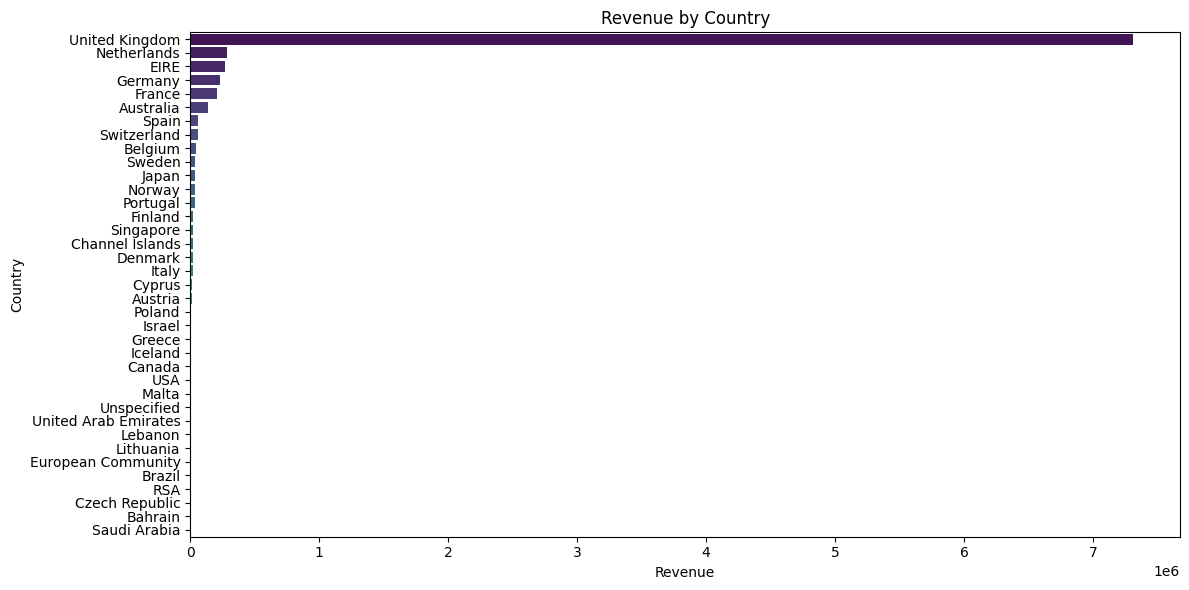

In [115]:
plt.figure(figsize=(12,6))
sns.barplot(
    x="TotalPrice",
    y="Country",
    data=country_revenue,
    hue="Country",       # assign hue to the same variable
    dodge=False,         # prevents duplicate bars
    legend=False,        # hides redundant legend
    palette="viridis"
)
plt.title("Revenue by Country")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

This chart displays total revenue generated across different countries. Each horizontal bar represents the revenue contribution of a specific country, allowing for quick comparison of market performance.

Top-performing countries include United Kingdom, which is by far the largest contributor to total revenue. Netherlands, EIRE, Germany, and France follow as strong secondary markets. Other notable contributors include Australia, Spain, Switzerland, and Belgium.

The chart shows that the UK dominates overall sales, suggesting a strong customer base or operational focus. Several European countries show consistent performance, indicating regional strength. Smaller markets such as Japan, USA, Czech Republic, and United Arab Emirates contribute modestly but may hold growth potential.

This distribution helps identify strategic markets for expansion, marketing investment, and inventory prioritization.